#### Контрольный вопрос: что такое порядок точности метода?
Ваш ответ: Это показатель, определяющий, насколько близко численное решение приближено к точному решению задачию. Например если в задаче о численном дифференцировании с помощью метода неопределённых коэффициентов было получено, что $\epsilon = O(h^N)$ (где $h$ - величина шага), то порядком точности метода будет показатель степени h: $N$.

#### Контрольный вопрос: какой порядок метода будет при численном дифференцировании по $N$ узлам и почему?

Ваш ответ: Порядок метода в этом случае будет равен $N$, так как можно построить метод на основе многочлена с неопределёнными коэффициентами, тогда ошибка метода будет оценавиться как $O(h^N)$.

#### Контрольный вопрос: как называется матрица СЛАУ на коэффициенты метода неопределенных коэффицентов? Существует ли единственное решение системы и почему?

Ваш ответ: Матрица Вандермонда. Система с такой матрицей совместна, и более того, имеет единственное решение: так как определитель такой матрицы не равен нулю, то по теореме Крамера решение существует и единственно.

In [46]:
#скрипт, который реализует алгоритм метода неопределенных коэффициентов
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    # формируем матрицу системы в нужном виде
    A = np.fliplr(np.vander(v, v.size)).T 
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252053


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов. Используйте логарифмический масштаб, разумное число узлов. Обратите внимание, что сначала ошибка убывает, затем растет. Объясните почему.
2. Написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности. Используйте логарифмический масштаб. Объясните поведение графика.

## Задание 1

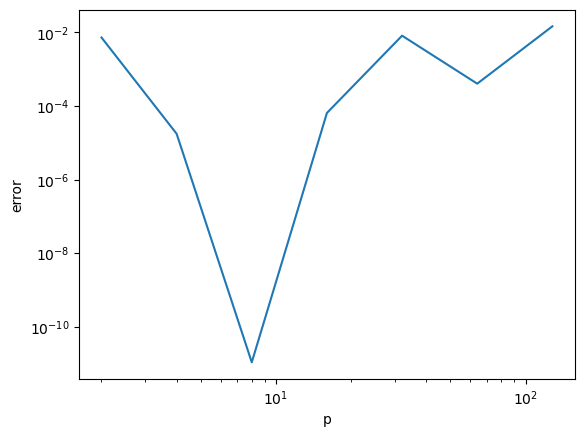

In [47]:
# Задание 1
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l, m, n)
    # формируем матрицу системы в нужном виде
    A = np.fliplr(np.vander(v, v.size)).T 
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

if __name__ == "__main__":
    p_list = [2**i for i in range(1, 9)]
    diff_list = []
    error_list = []

    a = np.pi/3     # левая граница
    b = np.pi/2     # правая граница
    
    for i in range(0, len(p_list)):
        p = p_list[i]
        x = np.linspace(a, b, p+1)      # наложение сетки
        u = np.sin(x)       # значения синуса в точках сетки
        h = (b-a)/p     # шаг сетки
        diff = get_diff(u, 0, p, h)     # считаем дифференциал в точке a
        diff_list.append(diff)
        error_list.append(abs(diff - np.cos(a)))      # считаем ошибку как разность (sin(pi/3) = 0.5) 

    #print(p_list)
    #print(diff_list)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("p")
    plt.ylabel("error")
    plt.plot(p_list, error_list)
    plt.show()


Полная ошибка равна сумме из ошибки округления и ошибки метода. При малом количестве узлов ошибка метода велика и много больше ошибки округления, поэтому поведение суммарной ошибки почти полностью повторяет поведение ошибки метода - уменьшается при увеличении количества узлов (левая часть графика). Далее наступает момент, когда ошибка метода сравнивается с ошибкой округления, тогда наступает минимум (или же плато). После, ошибка округления становится больше ошибки метода (чем больше узлов тем точнее результат) и полная ошибка повторяет поведение ошибки округления - растёт с ростом количеста точек (правая часть графика).

## Задание 2

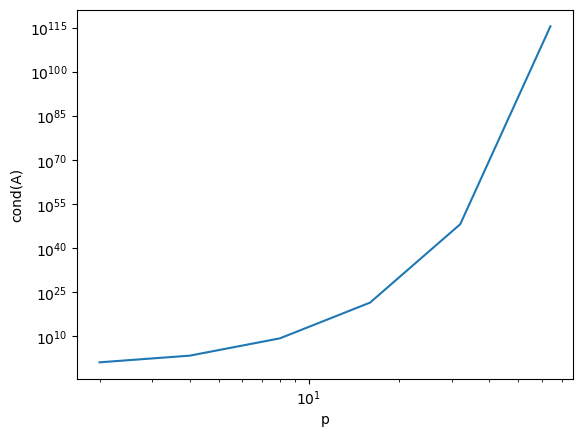

In [48]:
# Задание 2
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

def get_cond(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    # формируем матрицу системы в нужном виде
    A = np.fliplr(np.vander(v, v.size)).T 
    cond = la.cond(A)
    return cond

if __name__ == "__main__":
    p_list = [2**i for i in range(1, 7)]
    cond_list = []

    a = np.pi/3     # левая граница
    b = np.pi/2     # правая граница
    
    for i in range(0, len(p_list)):
        p = p_list[i]
        x = np.linspace(a, b, p+1)      # наложение сетки
        u = np.sin(x)       # значения синуса в точках сетки
        h = (b-a)/p     # шаг сетки
        cond = get_cond(u, 0, p, h)     # считаем дифференциал в точке a
        cond_list.append(cond)

    #print(p_list)
    #print(cond_list)

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("p")
    plt.ylabel("cond(A)")
    plt.plot(p_list, cond_list)
    plt.show()


Для матрицы Вандермонда в последних строчках стоят самые большие значения, причём сумма значений по строке степенным образом зависит от номера строки. Тогда норма такой матрицы будет степенным образом зависить от её размерности (вне зависимости, по какой норме считаем, там будут стоять элементы из последней строчки. При подсчёте обусловленности включаются зависимости более сложного характера (считается частное норм и берётся супремум по всем иксам, это если по определению), но можно точно сказать, что зависимость будет как минимум степенной. На графике это и можно увидеть: при строго степенной зависимости была бы прямая типа $y = kx, \; k>0$, так как масштаб логарифмический, но в реальности обусловленность растёт ещё быстрее.

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков. Исследуйте при это области как слева, так и справа от плато. Почему положения плато отличаются для двух методов и находятся именно на своих уровнях (обосновать аналитически).

## Задание 3

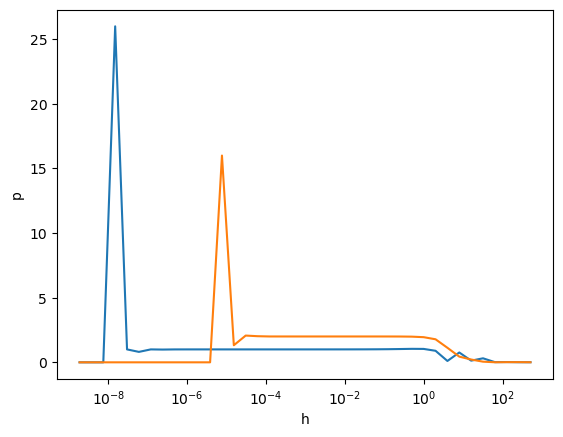

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la


def central_difference(a, h):
    diff = (np.sin(a+h) - np.sin(a-h))/(2*h)
    return diff

def directional_difference(a, h):
    diff = (np.sin(a+h) - np.sin(a))/h
    return diff

def get_p(a, h):
    try:
        diff_d1 = directional_difference(a, h)
        diff_d2 = directional_difference(a, h/2)
        err_d1 = abs(diff_d1 - np.cos(a))
        err_d2 = abs(diff_d2 - np.cos(a))
        p_directional = abs(np.log2(float(err_d1)/float(err_d2)))
    except ZeroDivisionError:
        print(err_d1, err_d2)

    try:
        diff_c1 = central_difference(a, h)
        diff_c2 = central_difference(a, h/2)
        err_c1 = abs(diff_c1 - np.cos(a))
        err_c2 = abs(diff_c2 - np.cos(a))
        p_central = abs(np.log2(float(err_c1)/float(err_c2)))
    except ZeroDivisionError:
        print(err_с1, err_с2)

    return p_directional, p_central


if __name__ == "__main__":
    h_list = [2**(i) for i in range(-29, 10)]
    p_list_directional = []
    p_list_central = []

    a = np.pi/3     # левая граница
    
    for i in range(0, len(h_list)):
        h = h_list[i]
        p_directional, p_central = get_p(a, h)
        p_list_directional.append(p_directional)
        p_list_central.append(p_central)
        
    #print(h_list)
    #print(p_list_directional)
    #print(p_list_central)
    
    
    plt.xscale("log")
    
    plt.plot(h_list, p_list_directional)
    plt.plot(h_list, p_list_central)
    
    plt.xlabel("h")
    plt.ylabel("p")
    
    plt.show()


Аналитически, раскладывая выражение для производных в ряд Тейлора, можно показать (было сделано на семинарах), что порядок точности для метода направленная разность равен 1, а для метода центральная разность равен 2. Отсутвствие плато на всём диапазоне значений $h$ опять же связанно с полной ошибкой. Слева, при очень малых $h$, оказывается существенной ошибка округления. Справа же превалирует ошибка метода: выражение $C \approx C_1$ верно только для малых значений $h$, поэтому численная формула для оценки порядка точности метода уже неточна. Видно, что ширина плато для двух графиков разная, причём для метода центральная разность она меньше. Это можно объяснить тем, что слева ошибка округления для центральной разности становится ощутимой граздо раньше, так как метод точнее, и соответственно при вычислении ошибка округления быстрее сравнивается по порядку велечины с самим значением ошибки. Справа же, очевидно, это явление не наблюдаетя и графики начинают расходится примерно в одном и том же месте.